In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_hotel_booking_demand.csv")

data.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [3]:
#check duplicate data
data.duplicated().sum()


np.int64(73371)

In [64]:
#count the data
data.count()

country                        83222
market_segment                 83573
previous_cancellations         83573
booking_changes                83573
deposit_type                   83573
days_in_waiting_list           83573
customer_type                  83573
reserved_room_type             83573
required_car_parking_spaces    83573
total_of_special_requests      83573
is_canceled                    83573
dtype: int64

In [4]:
#count unique values
data.nunique()

country                        162
market_segment                   8
previous_cancellations          15
booking_changes                 19
deposit_type                     3
days_in_waiting_list           115
customer_type                    4
reserved_room_type              10
required_car_parking_spaces      5
total_of_special_requests        6
is_canceled                      2
dtype: int64

In [9]:
data.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

In [10]:
data.country.isna().sum()/data.shape[0] * 100

np.float64(0.4199921027125986)

from the data above we could see that the percentages of missing data is 0.42 % of all data, but i would not recomend the data to be drop becuase that will also drop all the section without any null value. Therefore I'm going to change the missing country to be missing

In [4]:
#change the country null into non
data['country'] = data['country'].fillna('missing')

In [5]:
data.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

Because this is a data of booking in the hotel, an outlier is not an issue. Because it will make the data more flexible.

<Axes: xlabel='days_in_waiting_list'>

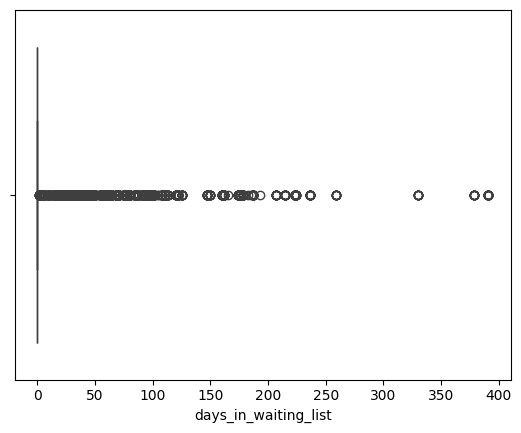

In [65]:
#check if the data have outlier 
sns.boxplot(x=data['days_in_waiting_list'])

In [68]:
#pd dataframe unique data
pd.DataFrame(data.nunique(), columns=['unique values'])

,unique values
country,162
market_segment,8
previous_cancellations,15
booking_changes,19
deposit_type,3
days_in_waiting_list,115
customer_type,4
reserved_room_type,10
required_car_parking_spaces,5
total_of_special_requests,6


To not make a racist or bias model, i will delete the country column,

In [6]:
data = data.drop(['country'], axis=1)

In [7]:

# copy only the customer type column
test_data = data[['customer_type']]

out = pd.get_dummies(test_data.astype(str))
out

#change the true = 1 and false = 0
out = out.replace({True: 1, False: 0})
out

#concat the data to the column of columns_customer_type
data = pd.concat ([data, out], axis=1).drop('customer_type', axis=1)
data


C:\Users\robby\AppData\Local\Temp\ipykernel_20076\255781079.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  out = out.replace({True: 1, False: 0})


,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Offline TA/TO,0,0,No Deposit,0,A,0,0,0,0,0,0,1
1,Online TA,0,0,No Deposit,0,A,0,2,0,0,0,1,0
2,Online TA,0,1,No Deposit,0,A,0,2,0,0,0,1,0
3,Online TA,0,0,No Deposit,0,A,0,1,1,0,0,1,0
4,Online TA,0,2,No Deposit,0,A,0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83568,Online TA,0,0,No Deposit,0,A,0,3,1,1,0,0,0
83569,Online TA,0,0,No Deposit,0,D,0,2,0,0,0,1,0
83570,Online TA,0,1,No Deposit,0,D,0,3,0,0,0,1,0
83571,Offline TA/TO,0,0,No Deposit,0,A,0,0,0,0,0,0,1


Because the market_segment and reserved_room_type have a lof of variables i will use characteristic encoding

In [8]:
# #change the market segment into number
data['market_segment'] = data['market_segment'].map({'Offline TA/TO': 0, 'Online TA': 1, 'Direct': 2, 'Groups': 3, 'Corporate': 4, 'Complementary': 5, 'Aviation': 6, 'Undefined': 7})

#change the reserved room type into number
data['reserved_room_type'] = data['reserved_room_type'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8, 'P': 9})

In [9]:
test_data = data[['deposit_type']]

out = pd.get_dummies(test_data.astype(str))

#change the true = 1 and false = 0
out = out.replace({True: 1, False: 0})

#make the deposit type into number
data = pd.concat([data, out], axis = 1).drop('deposit_type', axis=1)

data.head(5)


C:\Users\robby\AppData\Local\Temp\ipykernel_20076\3716335672.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  out = out.replace({True: 1, False: 0})


,market_segment,previous_cancellations,booking_changes,days_in_waiting_list,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,0,0,2,0,0,0,1,0,1,0,0
2,1,0,1,0,0,0,2,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0
4,1,0,2,0,0,0,2,0,0,0,1,0,1,0,0


In [73]:
data.shape

(83573, 15)

is_canceled
0    52795
1    30778
Name: count, dtype: int64


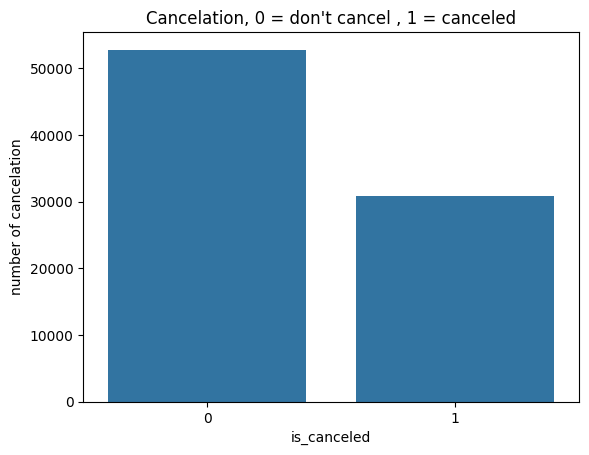

In [75]:
sns.countplot(x='is_canceled', data=data)
plt.title('Cancelation, 0 = don\'t cancel , 1 = canceled')
plt.ylabel('number of cancelation')
plt.xlabel('is_canceled')


#count the cancelation
print(data['is_canceled'].value_counts())

From the data above we could see that half data booking in hotel are canceled, that's mean the problem with this data is that the hotel management doesn't have a system to determine if the booking going to be cancel or not, therefore making lost of profit in near half of all booking. With this data we could make model/machine learing to predicts of which one booking have a higher chance of cancelation, to make the hotel more easily stretch the booked room.

Text(0.5, 0, 'is_canceled')

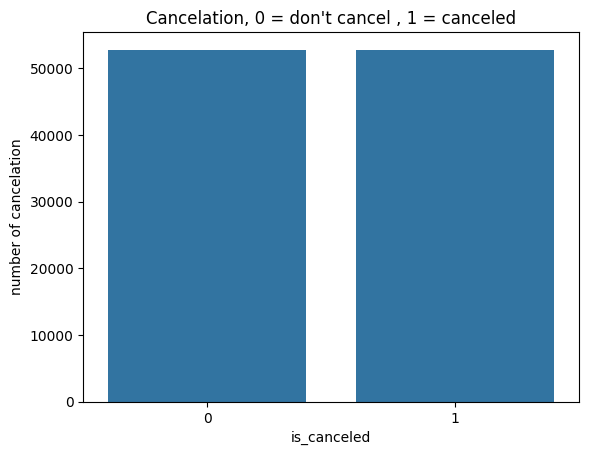

In [10]:
#AS we can see that the cancelation is not balanced, therefore we need to balance the data for the model by increasing the cancelation using smote
from imblearn.over_sampling import SMOTE


X = data.drop(['is_canceled'], axis=1)
y = data['is_canceled']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

sns.countplot(x=y_sm)
plt.title('Cancelation, 0 = don\'t cancel , 1 = canceled')
plt.ylabel('number of cancelation')
plt.xlabel('is_canceled')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0, stratify=y_sm)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [13]:
#scaler 
scaler = RobustScaler(
)

# Define the models
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)

#base model 
logreg_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', logreg)
])

logreg_standard_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', logreg)
])


knn_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', knn)
])


dtree_pipeline = Pipeline([
    ('model', dtree)
])

#meta model
meta_learning = LogisticRegression(max_iter=1000)

# Voting Classifier (Hard)
voting_clf_hard = VotingClassifier(
    estimators=[
        ('logreg', logreg_pipeline), 
        ('knn', knn_pipeline), 
        ('dtree', dtree_pipeline)
        ],voting='hard'
)

voting_clf_soft = VotingClassifier(
    estimators=[
        ('logreg', logreg_pipeline),
        ('knn', knn_pipeline),
        ('dtree', dtree_pipeline)
    ], voting='soft'
)


stacking_clf = StackingClassifier(
    estimators=[
        ('logreg', logreg_pipeline),
        ('knn', knn_pipeline),
        ('dtree', dtree_pipeline)
    ],final_estimator=meta_learning
)

Bagging_clf = BaggingClassifier(
    estimator=dtree_pipeline, 
    n_estimators=50,
    max_samples=0.5, 
    random_state=0
)

RandomForest_clf = RandomForestClassifier(
    n_estimators=50, 
    max_features="sqrt",
    criterion="entropy",
    random_state=0
)

adaboost_clf = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=0,
    algorithm="SAMME",
)

gradientboost_clf = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=0
)

xgb_clf = XGBClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=0,
    subsample=0.5
)


In [92]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

models = [logreg_pipeline, logreg_standard_pipeline , knn_pipeline, dtree_pipeline, voting_clf_hard, voting_clf_soft, stacking_clf, Bagging_clf, RandomForest_clf, adaboost_clf, gradientboost_clf, xgb_clf]

models_name = ['logreg_pipeline', 'logreg_standard_pipeline', 'knn_pipeline', 'dtree_pipeline', 'voting_clf_hard', 'voting_clf_soft', 'stacking_clf', 'Bagging_clf', 'RandomForest_clf', 'adaboost_clf', 'gradientboost_clf', 'xgb_clf']

# Create list to store evaluation score
f1_mean = []
f1_std = []
all_f1 = []


for model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    model_cv = cross_val_score(
        model, 
        X_train, 
        y_train, 
        cv=kfold, 
        scoring='f1', 
        n_jobs=-1)
    
    f1_mean.append(model_cv.mean())
    f1_std.append(model_cv.std())
    all_f1.append(model_cv.round(4))

In [29]:
pd.DataFrame({
    'model': models_name, 
    'f1_mean': f1_mean, 
    'f1_std': f1_std, 
    "all_value" : all_f1
    }).sort_values('f1_mean', ascending=False)

,model,f1_mean,f1_std,all_value
7,Bagging_clf,0.747578,0.002280,"[0.7436893203883496, 0.7482288828337874, 0.750..."
2,knn_pipeline,0.736015,0.008502,"[0.7449972461905636, 0.7289329195512055, 0.747..."
8,RandomForest_clf,0.735781,0.002689,"[0.7345186179134519, 0.7336628970000677, 0.738..."
11,xgb_clf,0.735114,0.002130,"[0.7335166677845597, 0.7336173666058023, 0.737..."
10,gradientboost_clf,0.732674,0.002486,"[0.7314501959724287, 0.7307067424857839, 0.734..."
5,voting_clf_soft,0.731619,0.009703,"[0.7414202322150234, 0.7162119786767012, 0.741..."
6,stacking_clf,0.725523,0.008584,"[0.7306604985864816, 0.7154816943646133, 0.734..."
4,voting_clf_hard,0.717136,0.009045,"[0.7289236479321315, 0.7018271869352788, 0.719..."
9,adaboost_clf,0.716398,0.006407,"[0.7203529334299071, 0.7114924743283162, 0.712..."
1,logreg_standard_pipeline,0.703938,0.004342,"[0.7070642024599137, 0.6973092750870529, 0.705..."


In [16]:
from sklearn.metrics import f1_score

In [17]:
models = [logreg_pipeline, logreg_standard_pipeline, knn_pipeline, dtree_pipeline, voting_clf_hard, voting_clf_soft, stacking_clf, Bagging_clf, RandomForest_clf, adaboost_clf, gradientboost_clf, xgb_clf]

models_name = [
    "logreg_pipeline",
    "logreg_standard_pipeline",
    "knn_pipeline",
    "dtree_pipeline",
    "voting_clf_hard",
    "voting_clf_soft",
    "stacking_clf",
    "Bagging_clf",
    "RandomForest_clf",
    "adaboost_clf",
    "gradientboost_clf",
    "xgb_clf"
]
# Create list to store evaluation score
list_f1 = []
dict_pred = {}
dict_proba = {}

for model, name in zip(models, models_name):

    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    if model in [logreg_pipeline, knn_pipeline, dtree_pipeline, voting_clf_soft]:
        y_proba = model.predict_proba(X_test)[:, 1]
        dict_proba[name] = y_proba.round(2)

    f1 = f1_score(y_test, pred)
    list_f1.append(f1)
    dict_pred[name] = pred

In [18]:
pd.DataFrame({
    'model': models_name, 
    'f1_score': list_f1,
    }).sort_values('f1_score', ascending=False)

,model,f1_score
7,Bagging_clf,0.748996
8,RandomForest_clf,0.736161
11,xgb_clf,0.735558
10,gradientboost_clf,0.733003
2,knn_pipeline,0.730403
5,voting_clf_soft,0.728291
4,voting_clf_hard,0.717459
6,stacking_clf,0.717448
9,adaboost_clf,0.712086
1,logreg_standard_pipeline,0.700439


In [ ]:
#to check which knn model seting is the best
from sklearn.model_selection import GridSearchCV

In [33]:
Bagging_clf = BaggingClassifier()

param_grid = {
    "estimator" : [dtree_pipeline, knn_pipeline],
    "n_estimators" : [25, 50, 75],
    "max_samples" : [0.25, 0.5, 0.75],
}

grid_search = GridSearchCV(
    Bagging_clf, 
    param_grid, 
    cv=5, 
    scoring='f1'
)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

print(grid_search.best_score_)

#don't start this, it took too much time. it took me 136 minutes to run this (The reason is that knn_pipeline is too slow)
#the best is estimator for f1 score = DecisionTreeClassifier(max_depth=5, random_state=0) , n_estimators = 75, max_samples = 0.75
# with f1 = 0.7476120382085297

{'estimator': Pipeline(steps=[('model', DecisionTreeClassifier(max_depth=5, random_state=0))]), 'max_samples': 0.75, 'n_estimators': 75}
0.7476120382085297


In [38]:
pd.DataFrame(grid_search.cv_results_). sort_values('mean_test_score', ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,2.451694,0.011084,0.113811,0.000897,"(DecisionTreeClassifier(max_depth=5, random_st...",0.75,75,{'estimator': (DecisionTreeClassifier(max_dept...,0.746280,0.747349,0.742138,0.752603,0.749689,0.747612,0.003494,1
7,1.653205,0.011295,0.076459,0.001627,"(DecisionTreeClassifier(max_depth=5, random_st...",0.75,50,{'estimator': (DecisionTreeClassifier(max_dept...,0.746280,0.747268,0.742138,0.752536,0.749689,0.747582,0.003476,2
3,0.569223,0.001551,0.040770,0.000920,"(DecisionTreeClassifier(max_depth=5, random_st...",0.50,25,{'estimator': (DecisionTreeClassifier(max_dept...,0.746280,0.747349,0.742138,0.752508,0.749568,0.747569,0.003452,3
1,0.637725,0.029919,0.078425,0.000963,"(DecisionTreeClassifier(max_depth=5, random_st...",0.25,50,{'estimator': (DecisionTreeClassifier(max_dept...,0.746280,0.747268,0.742138,0.752536,0.749608,0.747566,0.003466,4
2,0.919830,0.010057,0.114209,0.002834,"(DecisionTreeClassifier(max_depth=5, random_st...",0.25,75,{'estimator': (DecisionTreeClassifier(max_dept...,0.746280,0.747349,0.742138,0.750468,0.749730,0.747193,0.002952,5
5,1.747360,0.032347,0.117275,0.002002,"(DecisionTreeClassifier(max_depth=5, random_st...",0.50,75,{'estimator': (DecisionTreeClassifier(max_dept...,0.746280,0.747349,0.742138,0.749773,0.749689,0.747046,0.002800,6
6,0.835115,0.005013,0.041967,0.000513,"(DecisionTreeClassifier(max_depth=5, random_st...",0.75,25,{'estimator': (DecisionTreeClassifier(max_dept...,0.746280,0.747349,0.742138,0.749773,0.749649,0.747038,0.002792,7
4,1.142092,0.036408,0.078587,0.002467,"(DecisionTreeClassifier(max_depth=5, random_st...",0.50,50,{'estimator': (DecisionTreeClassifier(max_dept...,0.746280,0.747349,0.742138,0.749773,0.749608,0.747030,0.002784,8
0,0.320369,0.007544,0.042265,0.000672,"(DecisionTreeClassifier(max_depth=5, random_st...",0.25,25,{'estimator': (DecisionTreeClassifier(max_dept...,0.746280,0.723252,0.742138,0.754120,0.749689,0.743096,0.010676,9
12,2.373261,0.009279,84.722954,0.464634,"(RobustScaler(), KNeighborsClassifier())",0.50,25,"{'estimator': (RobustScaler(), KNeighborsClass...",0.739936,0.730939,0.740165,0.759360,0.743807,0.742841,0.009285,10


In [14]:
from sklearn.metrics import classification_report , confusion_matrix

In [17]:
dtree_pipeline = DecisionTreeClassifier(max_depth=5, random_state=0)

best_model = BaggingClassifier(
    estimator = dtree_pipeline,
    n_estimators = 75,
    max_samples = 0.75,
)

best_model.fit(X_train, y_train)

y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]


print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test))

[[6638 3921]
 [1876 8683]]
              precision    recall  f1-score   support

           0       0.78      0.63      0.70     10559
           1       0.69      0.82      0.75     10559

    accuracy                           0.73     21118
   macro avg       0.73      0.73      0.72     21118
weighted avg       0.73      0.73      0.72     21118

0.7497301731209256


In [58]:
#the accuracy score 
accuracy_score(y_test, y_pred_test)

0.7245477791457524

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error


MAE = mean_absolute_error(y_test, y_pred_test)
MSE = mean_squared_error(y_test, y_pred_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
MSLE = mean_squared_log_error(y_test, y_pred_test)

print (f'MAE (Mean Absolute Error) : {MAE}')
print (f'MSE (Mean Squared Error) : {MSE}')
print (f'MAPE (Mean Absolute Percentage Error) : {MAPE}')
print (f'MSLE (Mean Squared Log Error) : {MSLE}')

MAE (Mean Absolute Error) : 0.2754522208542476
MSE (Mean Squared Error) : 0.2754522208542476
MAPE (Mean Absolute Percentage Error) : 836401067267122.1
MSLE (Mean Squared Log Error) : 0.1323418496998853


Text(50.722222222222214, 0.5, 'y_true')

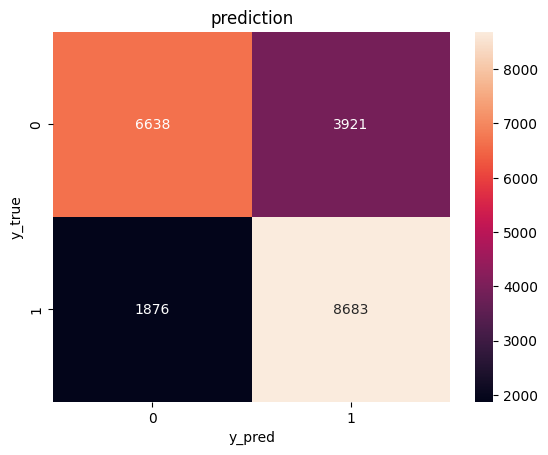

In [18]:
#print the sns heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d')
plt.title('prediction')
plt.xlabel('y_pred')
plt.ylabel('y_true')

There is some imbalance in the model's ability to predict the two classes, especially in terms of recall (Class 0: 0.63 vs Class 1: 0.82). This could suggest the model has a slightly higher tendency to correctly identify instances of Class 1 (positive class) than Class 0 (negative class). Because of this model will lead to more false positive prediction, that could lead to over capacity of the hotel if the hotel manager want to sell the predicted canceled customers leading to a bad review of the mases. we will not be using this model and f1 score to determine the model that we will pick.

From the previous model i will ad more variety of model by adding Bagging clf tree and knn. I will also add additional measuring score to predict the score more accurately for measuring the false positive with precision_score.

In [22]:
#scaler 
scaler = RobustScaler(
)

# Define the models
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)

#base model 
logreg_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', logreg)
])

logreg_standard_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', logreg)
])


knn_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', knn)
])


dtree_pipeline = Pipeline([
    ('model', dtree)
])

#meta model
meta_learning = LogisticRegression(max_iter=1000)

# Voting Classifier (Hard)
voting_clf_hard = VotingClassifier(
    estimators=[
        ('logreg', logreg_pipeline), 
        ('knn', knn_pipeline), 
        ('dtree', dtree_pipeline)
        ],voting='hard'
)

voting_clf_soft = VotingClassifier(
    estimators=[
        ('logreg', logreg_pipeline),
        ('knn', knn_pipeline),
        ('dtree', dtree_pipeline)
    ], voting='soft'
)


stacking_clf = StackingClassifier(
    estimators=[
        ('logreg', logreg_pipeline),
        ('knn', knn_pipeline),
        ('dtree', dtree_pipeline)
    ],final_estimator=meta_learning
)

Bagging_clf_tree = BaggingClassifier(
    estimator=dtree_pipeline, 
    n_estimators=50,
    max_samples=0.5, 
    random_state=0
)

Bagging_clf_knn = BaggingClassifier(
    estimator=knn_pipeline, 
    n_estimators=50,
    max_samples=0.5, 
    random_state=0
)

RandomForest_clf = RandomForestClassifier(
    n_estimators=50, 
    max_features="sqrt",
    criterion="entropy",
    random_state=0
)

adaboost_clf = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=0,
    algorithm="SAMME",
)

gradientboost_clf = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=0
)

xgb_clf = XGBClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=0,
    subsample=0.5
)


In [ ]:
#test scoring for precision and recall

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

models  = [
    logreg_pipeline, 
    knn_pipeline, 
    dtree_pipeline, 
    voting_clf_hard, 
    voting_clf_soft, 
    stacking_clf, 
    Bagging_clf_tree, 
    Bagging_clf_knn, 
    RandomForest_clf, 
    adaboost_clf, 
    gradientboost_clf, 
    xgb_clf
]

models_name = [
    'logreg_pipeline', 
    'knn_pipeline', 
    'dtree_pipeline', 
    'voting_clf_hard', 
    'voting_clf_soft', 
    'stacking_clf', 
    'Bagging_clf_tree', 
    'Bagging_clf_knn', 
    'RandomForest_clf', 
    'adaboost_clf', 
    'gradientboost_clf', 
    'xgb_clf'
]

# Create list to store evaluation score
list_f1 = []
dict_pred = {}
dict_proba = {}


for model, name in zip(models, models_name):

    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    threshold = 0.7

    if model in [logreg_pipeline, knn_pipeline, dtree_pipeline, voting_clf_soft]:
        y_proba = model.predict_proba(X_test)[:, 1]
        # dict_proba[name] = y_proba.round(2)

        y_pred_adjusted = (y_proba >= threshold).astype(int)
        dict_pred[name] = y_pred_adjusted
        

    f1 = f1_score(y_test, pred)
    list_f1.append(f1)
    dict_pred[name] = pred

    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    dict_pred[name] = [precision, recall]



In [ ]:
#print the precision and recall
pd.DataFrame({
    'model': models_name, 
    'f1_score': list_f1,
    'precision': [x[0] for x in dict_pred.values()],
    'recall': [x[1] for x in dict_pred.values()]
    }).sort_values('precision', ascending=False)

,model,f1_score,precision,recall
10,gradientboost_clf,0.730597,0.848534,0.641443
7,Bagging_clf_knn,0.732810,0.846593,0.645989
8,RandomForest_clf,0.734166,0.846316,0.648262
11,xgb_clf,0.731505,0.846039,0.644284
9,adaboost_clf,0.711052,0.817499,0.629132
4,voting_clf_soft,0.735802,0.773187,0.701866
5,stacking_clf,0.734905,0.756340,0.714651
0,logreg_pipeline,0.697337,0.744199,0.656028
3,voting_clf_hard,0.719992,0.723087,0.716924
1,knn_pipeline,0.746353,0.721574,0.772895


In [ ]:
#to check which knn model seting is the best
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier()


param_grid = {
    "n_estimators": [50, 75, 100],
    "learning_rate": [0.5, 1],
    "max_depth": [3, 5, 10],
    "criterion": ["friedman_mse","squared_error"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


grid_search = GridSearchCV(
    gradientboost_clf, 
    param_grid, 
    cv=5, 
    scoring='precision'
)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

print(grid_search.best_score_)

#don't start this, it took too much time. it took me 70 minutes to run this 
#the best is estimator = 'criterion': 'squared_error', 'learning_rate': 0.5, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50
# with precision score of 0.8557729228223911

{'criterion': 'squared_error', 'learning_rate': 0.5, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
0.8557729228223911


from the parameters above we could try the same parameter with different values, to see if the accuracy is better

In [ ]:
#to check which knn model seting is the best
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier()


param_grid = {
    "n_estimators": [50, 75, 100],
    "learning_rate": [0.4,0.5],
    "max_depth": [4, 5, 6],
    "criterion": ["squared_error"],
    "min_samples_split": [8, 10, 12],
    "min_samples_leaf": [1]
}


grid_search = GridSearchCV(
    gradientboost_clf, 
    param_grid, 
    cv=5, 
    scoring='precision'
)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

print(grid_search.best_score_)

{'criterion': 'squared_error', 'learning_rate': 0.4, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
0.8557150540152128


comparing both data, show that the value of precision best score at the first one exceeded the 2nd one by 0.8557729228223911 - 0.8557150540152128 = 5.786880717839615e-05. thus making the top parameters better

In [24]:
#bestmodel
from sklearn.metrics import confusion_matrix, classification_report

best_model = GradientBoostingClassifier(
    learning_rate=0.4,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=50,
    criterion="squared_error"
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9378 1181]
 [3702 6857]]
              precision    recall  f1-score   support

           0       0.72      0.89      0.79     10559
           1       0.85      0.65      0.74     10559

    accuracy                           0.77     21118
   macro avg       0.79      0.77      0.77     21118
weighted avg       0.79      0.77      0.77     21118



In [25]:
#The accuracy score of the model
accuracy_score(y_test, y_pred)

0.7687754522208542

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
# from sklearn.metrics import mean_percentage_error

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
MSLE = mean_squared_log_error(y_test, y_pred)



In [27]:
print (f'MAE (Mean Absolute Error) : {MAE}')
print (f'MSE (Mean Squared Error) : {MSE}')
print (f'RMSE (Root Mean Squared Error) : {RMSE}')
print (f'MAPE (Mean Absolute Percentage Error) : {MAPE}')
print (f'MSLE (Mean Squared Log Error) : {MSLE}')

MAE (Mean Absolute Error) : 0.23122454777914575
MSE (Mean Squared Error) : 0.23122454777914575
RMSE (Root Mean Squared Error) : 0.48085813685446327
MAPE (Mean Absolute Percentage Error) : 251858658960344.7
MSLE (Mean Squared Log Error) : 0.11109253087236372


from the data above we could see that the values that we got what we want, by using the model we could lower the prediction of false positive, that mean the people that won't cancel the booking will have a lower chance to be flaged as cancel by the model. making this model the best for booking business.

In [ ]:
#to show when the model can be trusted or not, we can use precision score. 

#score of model using f1 score as metric

MAE (Mean Absolute Error) : 0.2754522208542476

MSE (Mean Squared Error) : 0.2754522208542476

MAPE (Mean Absolute Percentage Error) : 836401067267122.1

MSLE (Mean Squared Log Error) : 0.1323418496998853



#score using precision score as metric

MAE (Mean Absolute Error) : 0.2333080784165167

MSE (Mean Squared Error) : 0.2333080784165167

RMSE (Root Mean Squared Error) : 0.48301974950980703

MAPE (Mean Absolute Percentage Error) : 257829905743485.78

MSLE (Mean Squared Log Error) : 0.11209356944667952

In [31]:
#example of money could be gain from using this model

booking_price = 2000000
booking_quantity = 100

error = 0.23

lost_money = (booking_price * booking_quantity) * error
gain_money = (booking_price * booking_quantity) - lost_money

print(f" money lost : {lost_money} \n money gain : {gain_money}")

# but this doesn't translate the real value because from we can check from the heatmap, 3718 - 1209 = 2509. 
# 
# could be the real error, if the false positive and false negative are in the same time

 money lost : 46000000.0 
 money gain : 154000000.0


In [28]:
import pickle


pickle.dump(best_model, open('Robby_Edwardo_best_model.pkl', 'wb'))